# Session 4 - Baseline Model Building

Python Notebook [Colab/Jupyter] includes:
*  Important libraries overview
*  Baseline model building
*  Testing accuracy
*  Evaluation metrics


*ML Objective: Predict Target Value (Like/No Like)*

Import needed libraries and packages:



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


Step 1: Load the clean data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/clean_data.csv'
df = pd.read_csv(file_path)
df.head(10)

,Acousticness,Danceability,Duration,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time_Signature,Valence,Target,TempoVariability,TempoRange
0,-0.682956,1.332913,-0.508052,-1.179049,-0.407036,2,-0.165984,-0.457521,1,3.777457,1.066649,4,-0.855011,1,1.000249,6.42666
1,0.044243,0.773779,0.983794,-1.535847,-0.464896,1,-0.346011,-0.885152,1,-0.146977,1.442230,4,0.367140,1,1.000249,6.42666
2,-0.589746,1.363976,-0.738452,-1.283709,-0.486428,2,-0.204561,-0.018972,1,2.192503,-1.744977,4,-1.312305,1,1.000249,6.42666
3,1.604177,-0.773161,-0.571307,-1.635750,1.381537,5,-0.634054,-2.172574,1,-0.741893,-1.316813,4,-1.081634,1,1.000249,6.42666
4,-0.028939,0.369959,1.788174,-0.574871,1.388866,5,1.595710,-1.217193,0,-0.258593,1.963980,4,1.645946,1,1.000249,6.42666
5,-0.703794,1.152748,0.061855,-0.579628,-0.487285,8,-0.172413,0.105111,1,1.031692,-1.370971,4,-0.944041,1,1.000249,6.42666
6,-0.666394,0.748928,-0.059278,-0.998271,-0.487259,1,0.104057,-1.098968,1,0.708005,-1.558105,4,-0.765980,1,1.000249,6.42666
7,-0.644440,-2.189636,1.261034,-1.588177,1.945848,10,-0.198131,-1.206808,0,-0.619114,0.845221,4,-0.421997,1,1.000249,6.42666
8,-0.536977,-0.095987,-0.529357,1.247178,-0.487285,11,0.972045,0.918836,0,2.839879,0.316050,4,-0.401763,1,1.000249,6.42666
9,-0.714232,1.351551,-0.236836,-0.375064,-0.487285,7,2.444409,-0.190451,1,1.612098,-0.809867,4,-0.450325,1,1.000249,6.42666


Step 2: Check class imbalance/balance on the dataset once more to select the best baseline model strategy

In [ ]:
df['Target'].value_counts()


1    1015
0     997
Name: Target, dtype: int64

Step 3: Split into training & testing sets and Standardize:

In [ ]:
# Split the data into training and testing sets

y = df['Target']
X = df.drop('Target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (1408, 15)
y_train shape: (1408,)


In [ ]:
# Fit the standard scaler to the training data and transform both training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Mean:", X_test_scaled.mean(axis=0))
print("Standard Deviation:", X_test_scaled.std(axis=0))

Mean: [-1.50598998e-02 -4.39985727e-02 -3.74181888e-02  2.21015279e-02
 -1.04027655e-02  7.24970296e-02  4.27782610e-02  4.94624596e-02
 -8.96426544e-03  2.85692752e-02  2.22224732e-02  5.53884838e-02
 -4.20244770e-02  2.22044605e-16 -1.77635684e-15]
Standard Deviation: [0.98977298 1.0009912  0.97598015 0.96421898 0.96137199 0.98457794
 1.01310234 0.92629748 1.0020498  1.04394353 1.07212766 0.87707868
 1.00608464 0.         0.        ]


**Build a Baseline model using a simple Classification algorithm, such as the DummyClassifier in Scikit-learn.**
This will serve as a reference point for comparing the performance of more advanced models.

The DummyClassifier is a **simple** and **interpretable** baseline model that provides a performance benchmark for more advanced models. It can be particularly **useful in scenarios where simplicity and interpretability are valued, or when assessing the effectiveness of models in handling class imbalance**.

**The strategy parameter of the DummyClassifier determines how the predictions are made. In the case of strategy='most_frequent', the DummyClassifier always predicts the most frequent class in the training data.** This means that it ignores all the input features and simply predicts the class that occurs most frequently in the training data. The most_frequent strategy is useful as a baseline model for classification problems where the classes are imbalanced or one class is much more frequent than the others. It provides a simple and easy-to-implement model that sets a lower bound for the performance of more advanced models.

**In the stratified dummy classifier strategy, the predictions are generated by randomly choosing the class based on the class distribution in the training data.** This ensures that the predictions are made based on similar classess as in the training data, which can provide a more realistic baseline for comparison with more advanced models.

'uniform', 'stratified', 'prior', 'most_frequent', 'constant'

Step 4: Using most frequent dummy classifier

In [ ]:
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
print(y_pred)
len(y_pred)

Using stratified dummy classifier:

In [ ]:
# Create a dummy classifier with 'stratified' strategy
dummy_clf = DummyClassifier(strategy='stratified', random_state=42)

# Fit the dummy classifier to the training data
dummy_clf.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = dummy_clf.predict(X_test_scaled)

Let's view the output table of the actual class labels and the predicted class labels for each observation in the test to visualize the product of our model

In [ ]:
print(y_pred)


[0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0
 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1
 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0
 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1
 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1
 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1
 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0
 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0
 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1
 1 0 1 1 1 0 0 1 1 0 1 0 

In [ ]:
# Create a new DataFrame with the actual and predicted labels
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the first 10 rows of the results DataFrame
print(results.head(10))

      Actual  Predicted
1317       0          0
526        1          1
393        1          1
1405       0          1
433        1          0
576        1          0
1089       0          0
429        1          1
611        1          1
530        1          1


Evaluate the model: Evaluate the performance of the baseline model using **Accuracy Score** and **Confusion Matrix**.

This code calculates the accuracy score of the model using the accuracy_score function of Scikit-learn, and displays a confusion matrix using the confusion_matrix function and Seaborn's heatmap function.

Accuracy: 0.48344370860927155


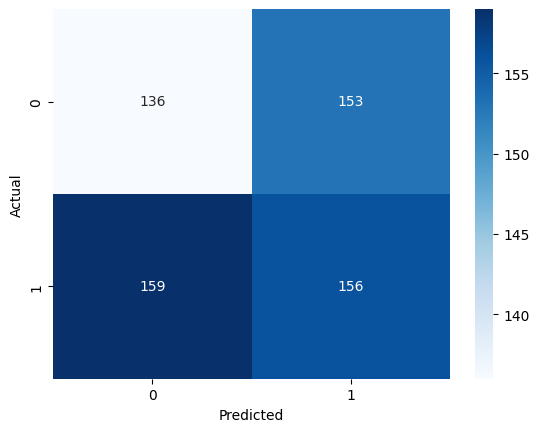

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

A baseline model in theory should be about as accurate as predicting a coin toss. We have 48% accuracy on the test data using our baseline model.

Accuracy alone can be misleading, especially if the classes are imbalanced. To get a more detailed view of the model's performance, we can look at the confusion matrix.

The confusion matrix provides the counts of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) for the model's predictions. Based on these counts, we can calculate precision, recall, and F1-score for the model.



*   Precision: measures the fraction of true positives among all positive predictions. A high precision indicates that the model has a low rate of false positives.
* Recall: measures the fraction of true positives among all actual positives. A high recall indicates that the model has a low rate of false negatives.
* F1-score: a weighted harmonic mean of precision and recall, which can be useful for balancing the trade-off between precision and recall.

In [ ]:
# Generate a confusion matrix for the predictions
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

[[136 153]
 [159 156]]
Precision: 0.5048543689320388
Recall: 0.49523809523809526
F1-score: 0.5


**Interpretation of the confusion matrix & Conclusion:**

1.    The precision score of 0.51 indicates that the model has a high rate of false positives, which means that it is incorrectly classifying many observations in class 0 as class 1.
2.  The recall score of 0.50 indicates that the model has a balanced rate of false negatives. But that is still too many false negatives.


